# Use a feed forward neural net built in keras to study MNIST

In [32]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import keras.callbacks as cb
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout, Flatten, MaxPooling2D
from keras.layers.convolutional import Conv2D
#from keras.layers.pooling import MaxPooling2D
from keras.models import Sequential
from keras.optimizers import SGD
from keras.regularizers import l1, l2
from keras.utils import np_utils

## Preprocessing
- Min-max normalization
- Standardization

In [22]:
from sklearn import preprocessing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(type(X_train))
print(X_train.shape)
print(X_test.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
(10000, 28, 28)


In [4]:
print(type(y_train))
print(y_train.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
(60000,)
(10000,)


Transform y using one-hot encoding

In [23]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

Min-max normalization (each pixel if a number from 0 to 255)

In [24]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Standardization

In [7]:
#from sklearn import preprocessing
#X_train = preprocessing.scale(X_train)
#X_test = preprocessing.scale(X_test)

Reshape X for FNN or CNN

In [26]:
def reshape_X_FNN(X_train, X_test):
    X_train = np.reshape(X_train, (60000, 784))
    X_test = np.reshape(X_test, (10000, 784))
    return X_train, X_test
    
def reshape_X_CNN(X_train, X_test):
    X_train = np.reshape(X_train, (60000, 28, 28, 1))
    X_test = np.reshape(X_test, (10000, 28, 28, 1))
    return X_train, X_test

In [27]:
#X_train, X_test = reshape_X_FNN(X_train, X_test)
X_train, X_test = reshape_X_CNN(X_train, X_test)

## Build the neural network

Key parameters for a FNN (Sequential)
- Layer width
- Activation function: sigmoid, relu, tanh
- Loss fuction: categorical_crossentropy, mean_square_error
- Optimizer: SGD
- Dropout: Usually 0.1-0.3
- Regularazation: l1(0.01), l2(0.01)
- Learning rate: 

CNN exclusive
- Filters
- Stride
- Padding
- Maxpooling

Function to build a FNN

In [13]:
def build_FNN():
    # parameters
    first_layer_width = 128
    second_layer_width = 64
    activition_func = 'relu'
    loss_func = 'categorical_crossentropy'
    dropout_rate = 0.1
    #weight_regularizer = l2(0.01)
    weight_regularizer = None
    learning_rate = 0.1
    
    # Start to build the model
    model = Sequential()
    # first hidden layer
    model.add(Dense(first_layer_width,
                    activation = 'relu',
                    input_dim = 784,
                    kernel_regularizer = weight_regularizer
                   ))
    if dropout_rate > 0:
        model.add(Dropout(0.1))
    
    # second hidden layer
    model.add(Dense(second_layer_width,
                   activation = 'relu',
                   kernel_regularizer = weight_regularizer))
    if dropout_rate > 0:
        model.add(Dropout(0.1))
        
    # softmax layer
    model.add(Dense(10,
                   activation = 'softmax'
                   ))
    optimizer = SGD(lr=learning_rate, clipnorm=5)
    
    # compile the model, to add loss and optimizer
    model.compile(loss = loss_func,
                  optimizer = optimizer,
                  metrics = ['accuracy']
                 )
    
    return model

Function to build a CNN

In [41]:
def build_CNN():
    #parameters
    num_filters = 15
    filter_size = 3
    learning_rate = 0.1
    loss_func = 'categorical_crossentropy'
    
    # Start to build the model
    model = Sequential()
    
    # Add the convolution layer
    model.add(Conv2D(num_filters,
                     (filter_size, filter_size),
                     activation = 'relu',
                     input_shape = (28, 28, 1),
                     padding = 'valid'
                    ))
    # Add the maxpooling
    #model.add(Maxpooling2D(pool_size=(2, 2)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Flatten and add softmax layer
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    optimizer = SGD(lr=learning_rate, clipnorm=5.)
    
    # Compile the model
    model.compile(loss=loss_func, optimizer=optimizer, metrics=['accuracy'])
    
    return model

## Train the model

In [17]:
num_batches = 128
num_epochs = 20
#model = build_FNN()
model = build_CNN()

start_time = time.time()

# Use 55000 records to train and 5000 for validation
training = model.fit(X_train[:55000], y_train[:55000], epochs=num_epochs, batch_size=num_batches,
                    validation_data=(X_train[55000:], y_train[55000:]))
print('The training took {0} seconds'.format(time.time() - start_time))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 3s 46us/step - loss: 0.5357 - acc: 0.8413 - val_loss: 0.2030 - val_acc: 0.9454
Epoch 2/20
55000/55000 [==============================] - 2s 40us/step - loss: 0.2685 - acc: 0.9212 - val_loss: 0.1525 - val_acc: 0.9564
Epoch 3/20
55000/55000 [==============================] - 2s 40us/step - loss: 0.2058 - acc: 0.9403 - val_loss: 0.1218 - val_acc: 0.9656
Epoch 4/20
55000/55000 [==============================] - 2s 43us/step - loss: 0.1728 - acc: 0.9495 - val_loss: 0.1085 - val_acc: 0.9698
Epoch 5/20
55000/55000 [==============================] - 2s 43us/step - loss: 0.1491 - acc: 0.9565 - val_loss: 0.1020 - val_acc: 0.9698
Epoch 6/20
55000/55000 [==============================] - 2s 41us/step - loss: 0.1338 - acc: 0.9599 - val_loss: 0.0874 - val_acc: 0.9740
Epoch 7/20
55000/55000 [==============================] - 2s 39us/step - loss: 0.1198 - acc: 0.9638 - val_loss: 0.0837 - val_acc:

## Plot loss/accuracy vs # of epochs

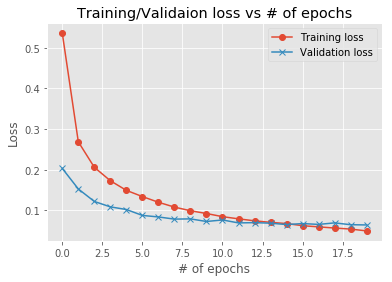

In [18]:
loss_train = training.history['loss']
val_loss_train = training.history['val_loss']

fig, ax = plt.subplots()
ax.plot(loss_train, 'o-', label='Training loss')
ax.plot(val_loss_train, 'x-', label='Validation loss')
ax.legend()
ax.set_title('Training/Validaion loss vs # of epochs')
ax.set_xlabel('# of epochs')
ax.set_ylabel('Loss')

plt.show()

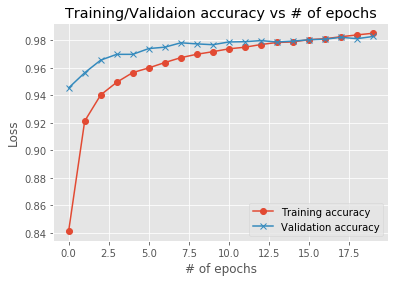

In [19]:
acc_train = training.history['acc']
val_acc_train = training.history['val_acc']

fig, ax = plt.subplots()
ax.plot(acc_train, 'o-', label='Training accuracy')
ax.plot(val_acc_train, 'x-', label='Validation accuracy')
ax.legend()
ax.set_title('Training/Validaion accuracy vs # of epochs')
ax.set_xlabel('# of epochs')
ax.set_ylabel('Loss')

plt.show()

## Apply the model on the test data

In [20]:
test_score = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 30us/step


In [21]:
test_score # loss, accuracy

[0.07276835615767632, 0.9783]

## Copy the code and show results for CNN

In [42]:
num_batches = 128
num_epochs = 20
#model = build_FNN()
model = build_CNN()

start_time = time.time()

# Use 55000 records to train and 5000 for validation
training = model.fit(X_train[:55000], y_train[:55000], epochs=num_epochs, batch_size=num_batches,
                    validation_data=(X_train[55000:], y_train[55000:]))
print('The training took {0} seconds'.format(time.time() - start_time))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 17s 310us/step - loss: 0.4709 - acc: 0.8601 - val_loss: 0.2414 - val_acc: 0.9306
Epoch 2/20
55000/55000 [==============================] - 16s 295us/step - loss: 0.2515 - acc: 0.9264 - val_loss: 0.1583 - val_acc: 0.9598
Epoch 3/20
55000/55000 [==============================] - 17s 309us/step - loss: 0.1757 - acc: 0.9502 - val_loss: 0.1287 - val_acc: 0.9658
Epoch 4/20
55000/55000 [==============================] - 16s 295us/step - loss: 0.1346 - acc: 0.9620 - val_loss: 0.0959 - val_acc: 0.9778
Epoch 5/20
55000/55000 [==============================] - 16s 299us/step - loss: 0.1115 - acc: 0.9686 - val_loss: 0.0851 - val_acc: 0.9814
Epoch 6/20
55000/55000 [==============================] - 16s 296us/step - loss: 0.0965 - acc: 0.9732 - val_loss: 0.0791 - val_acc: 0.9820
Epoch 7/20
55000/55000 [==============================] - 16s 295us/step - loss: 0.0866 - acc: 0.9759 - val_loss: 0.0

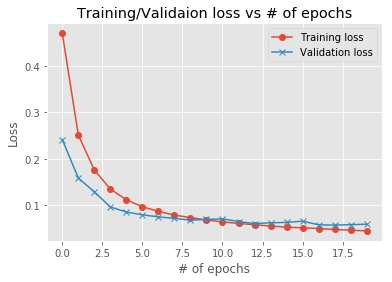

In [43]:
loss_train = training.history['loss']
val_loss_train = training.history['val_loss']

fig, ax = plt.subplots()
ax.plot(loss_train, 'o-', label='Training loss')
ax.plot(val_loss_train, 'x-', label='Validation loss')
ax.legend()
ax.set_title('Training/Validaion loss vs # of epochs')
ax.set_xlabel('# of epochs')
ax.set_ylabel('Loss')

plt.show()

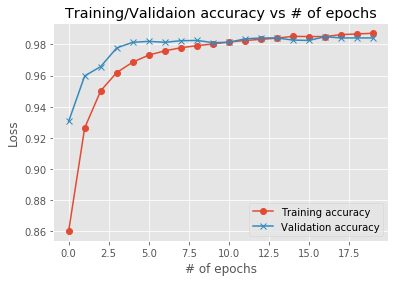

In [44]:
acc_train = training.history['acc']
val_acc_train = training.history['val_acc']

fig, ax = plt.subplots()
ax.plot(acc_train, 'o-', label='Training accuracy')
ax.plot(val_acc_train, 'x-', label='Validation accuracy')
ax.legend()
ax.set_title('Training/Validaion accuracy vs # of epochs')
ax.set_xlabel('# of epochs')
ax.set_ylabel('Loss')

plt.show()

In [45]:
test_score = model.evaluate(X_test, y_test)
test_score # loss, accuracy

10000/10000 [==============================] - 2s 201us/step


[0.060088034370541575, 0.9812]